In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#start with just a few rabbits; initial was 24?
max_population = 600000000 #six hundred million in reality; this is known as the carrying capacity

In [10]:
#Two rabbits can make four rabbits every 4 weeks. Thus the growth rate is 4babys /2parents /4weeks = .5
growth_rate = .5 #increases by 20% each generation # this is the growth rate per week

In [11]:
#Rabbit facts
#rabbits with myxomatosis die within two weeks
myxo_time_to_death = 2 #weeks
time_to_sexual_maturity = 17 #weeks
#from internet: rabbits are receptive to mating about 14 of every 16 days
connections_per_day = 10 #include those that are close enough to be bit by same mosquito
chance_of_being_infected = .2
week_myxo_released = 520
num_myxo_released = 5000
#where is length of live factored in?

In [12]:
def spread_myxo(infected, resistant, total): #infected is the number of infected rabbits, total is the total population
    susceptible = total - resistant - infected
    susceptible_percentage = susceptible / total
    #print(susceptible_percentage)
    new_infections = round(infected * connections_per_day * chance_of_being_infected * susceptible_percentage)
    #print("infected: {}".format(infected))
    #print("susceptible: {}".format(susceptible))
    return new_infections

In [13]:
'''#Determine if myxo resistance is spread by one or both parents!!
def births(population, myxo_resistance):
    births = round(population * growth_rate)
    new_myxo_resistance = round(births * (myxo_resistance/population)) #births times to fraction of population that is resistant
    return (births, new_myxo_resistance)'''

'#Determine if myxo resistance is spread by one or both parents!!\ndef births(population, myxo_resistance):\n    births = round(population * growth_rate)\n    new_myxo_resistance = round(births * (myxo_resistance/population)) #births times to fraction of population that is resistant\n    return (births, new_myxo_resistance)'

In [14]:
#Pure population growth
def pop_grow(population, sex_mature_pop): # this is from one week to the next #this should be population sexually mature
    new = round(growth_rate*sex_mature_pop*(1-population/max_population))
    #print(new)
    return new 

In [ ]:
#Let's see how long it takes to reach a saturation point.


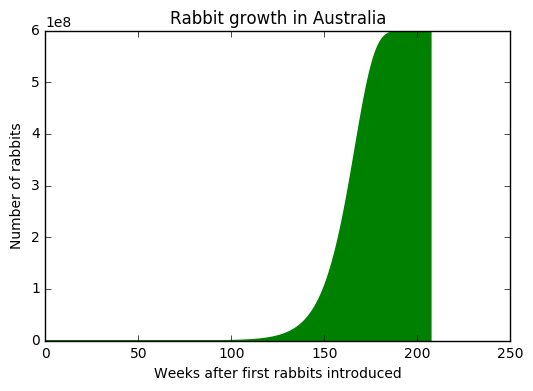

In [25]:
#Let's see what would happen if the population grew without the disease
num_iterations = 208 # weeks
rabbit_population, infected, myxomatosis_resistant = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
rabbit_population[0] = 24
for x in range(1, num_iterations):
    
    if x<17: #If it's under 17 weeks then the only sexually mature rabbits are the 24 that started
        pop = pop_grow(rabbit_population[x-1], 24)
    else:
        pop = pop_grow(rabbit_population[x-1], rabbit_population[x-time_to_sexual_maturity])
    rabbit_population[x] = rabbit_population[x-1] + pop

x = np.arange(num_iterations)
fig, ax = plt.subplots()
ax.fill_between(x, 0, rabbit_population, color='g')
ax.set_title("Rabbit growth in Australia")
ax.set_xlabel("Weeks after first rabbits introduced")
ax.set_ylabel("Number of rabbits")
plt.show()

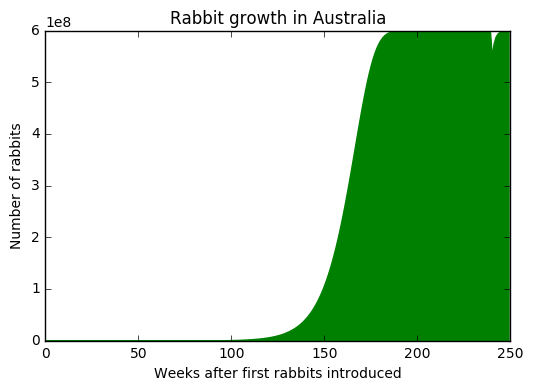

In [23]:
#Now let's try to kill fifty million off and see what would happen
num_iterations = 250 # weeks
rabbit_population, infected, myxomatosis_resistant = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
percent_resistant = np.zeros(num_iterations)
rabbit_population[0] = 24
for x in range(1, num_iterations):
    
    if x<17: #If it's under 17 weeks then the only sexually mature rabbits are the 24 that started
        pop = pop_grow(rabbit_population[x-1], 24)
    else:
        pop = pop_grow(rabbit_population[x-1], rabbit_population[x-time_to_sexual_maturity])
    rabbit_population[x] = rabbit_population[x-1] + pop
    myxomatosis_resistant[x] = myxomatosis_resistant[x-1] + (pop*percent_resistant[x-1])
    percent_resistant[x] = myxomatosis_resistant[x]/rabbit_population[x]
    if x == 240:
        rabbit_population[x] -= 50000000 #fifty million 

x = np.arange(num_iterations)
fig, ax = plt.subplots()
ax.fill_between(x, 0, rabbit_population, color='g')
ax.set_title("Rabbit growth in Australia")
ax.set_xlabel("Weeks after first rabbits introduced")
ax.set_ylabel("Number of rabbits")
plt.show()

Rabbits have been removed


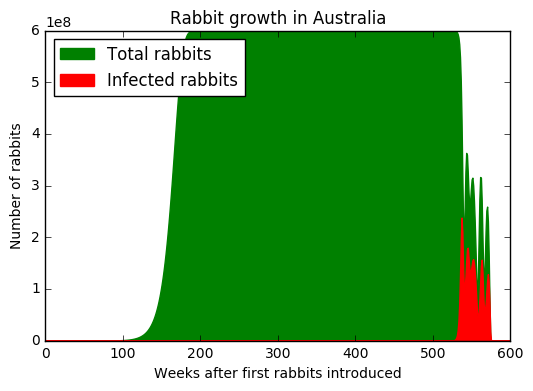

In [26]:
#This one starts at week zero. The one below it starts with a full population
#Let's see what would happen if the population grew with the disease but without the resistance
num_iterations = 600 # weeks
rabbit_population, infected, myxomatosis_resistant = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
percent_resistant = np.zeros(num_iterations)
rabbit_population[0] = 24
infected[week_myxo_released] = num_myxo_released
for x in range(1, num_iterations):
    if x<17: #If it's under 17 weeks then the only sexually mature rabbits are the 24 that started
        pop = pop_grow(rabbit_population[x-1], 24)
    else:
        pop = pop_grow(rabbit_population[x-1], rabbit_population[x-time_to_sexual_maturity])
    #print(x)
    #print(rabbit_population[x-1])
    if rabbit_population[x-1] < 2:
        print("Rabbits have been removed")
        break
    if x>week_myxo_released: #If we're past the time myxo was first released
        infected[x] = spread_myxo(infected[x-1], 0, rabbit_population[x-1]) #0 rabbits are resistant
    dead_from_myxo = infected[x-myxo_time_to_death]
    rabbit_population[x] = rabbit_population[x-1] + pop - dead_from_myxo
    if rabbit_population[x] < 0:
        rabbit_population[x] = 0
    if infected[x] < 0:
        infected[x] = 0

x = np.arange(num_iterations)
fig, ax = plt.subplots()
ax.fill_between(x, 0, rabbit_population, color='g')
ax.fill_between(x, 0, infected, color='r')
ax.set_title("Rabbit growth in Australia")
ax.set_xlabel("Weeks after first rabbits introduced")
ax.set_ylabel("Number of rabbits")
ax.legend(("Total rabbits", "Infected rabbits"), loc='upper left')
plt.show()

Rabbits have been removed


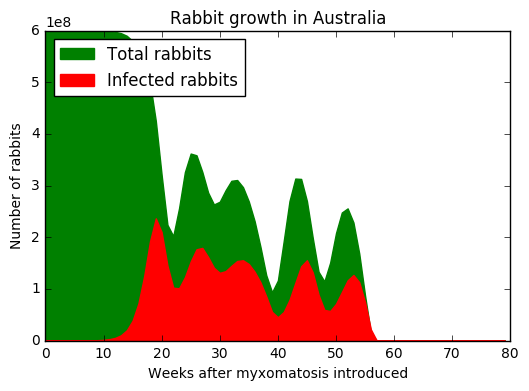

In [32]:
#Now let's start the population at 600000000 and introduce the disease
num_iterations = 80 # weeks
rabbit_population, infected, myxomatosis_resistant = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
percent_resistant = np.zeros(num_iterations)
rabbit_population[0] = 600000000
relative_week_myxo_released = 2
infected[relative_week_myxo_released] = num_myxo_released
for x in range(1, num_iterations):
    pop = pop_grow(rabbit_population[x-1], rabbit_population[x-time_to_sexual_maturity])
    if rabbit_population[x-1] < 2:
        print("Rabbits have been removed")
        break
    if x>relative_week_myxo_released: #If we're past the time myxo was first released
        infected[x] = spread_myxo(infected[x-1], 0, rabbit_population[x-1]) #0 rabbits are resistant
    dead_from_myxo = infected[x-myxo_time_to_death]
    rabbit_population[x] = rabbit_population[x-1] + pop - dead_from_myxo
    if rabbit_population[x] < 0:
        rabbit_population[x] = 0
    if infected[x] < 0:
        infected[x] = 0

x = np.arange(num_iterations)
fig, ax = plt.subplots()
ax.fill_between(x, 0, rabbit_population, color='g')
ax.fill_between(x, 0, infected, color='r')
ax.set_title("Rabbit growth in Australia")
ax.set_xlabel("Weeks after myxomatosis introduced")
ax.set_ylabel("Number of rabbits")
ax.legend(("Total rabbits", "Infected rabbits"), loc='upper left')
plt.show()

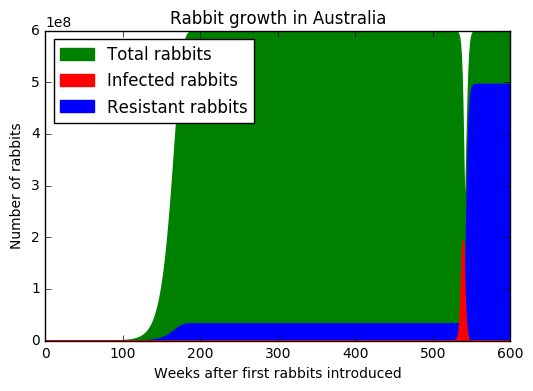

In [33]:
#pop growth with no disease - use this to tell the number of new rabbits, which includes births and death from overpopulation
#the gestation is incorporated into the growth rate, so you don't have to calculated number of births or natural deaths
#this encompasses births and natural deaths
#Stop using births and overcapacity deaths and population next week
#use this as additional rabbits and then subtract myxo deaths from the total population after you've added this!
num_iterations = 600
rabbit_population, infected, myxomatosis_resistant = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
percent_resistant = np.zeros(num_iterations)
rabbit_population[0] = 24
myxomatosis_resistant[0] = round(rabbit_population[0] / 10)
infected[week_myxo_released] = num_myxo_released
for x in range(1, num_iterations):
    if x<17: #If it's under 17 weeks then the only sexually mature rabbits are the 24 that started
        pop = pop_grow(rabbit_population[x-1], 24)
    else:
        pop = pop_grow(rabbit_population[x-1], rabbit_population[x-time_to_sexual_maturity])
    if rabbit_population[x-1] < 2:
        print("Rabbits have been removed")
        break
    if x>week_myxo_released:
        infected[x] = spread_myxo(infected[x-1], myxomatosis_resistant[x-1], rabbit_population[x-1])
    rabbit_population[x] = rabbit_population[x-1] + pop - infected[x-myxo_time_to_death]
    myxomatosis_resistant[x] = myxomatosis_resistant[x-1] + (pop*percent_resistant[x-1])
    percent_resistant[x] = myxomatosis_resistant[x]/rabbit_population[x]

x = np.arange(num_iterations)
fig, ax = plt.subplots()
ax.fill_between(x, 0, rabbit_population, color='g')
ax.fill_between(x, 0, infected, color='r')
ax.fill_between(x, 0, myxomatosis_resistant, color='b')
ax.fill_between(x, 0, infected, color='r')
ax.set_title("Rabbit growth in Australia")
ax.set_xlabel("Weeks after first rabbits introduced")
ax.set_ylabel("Number of rabbits")
ax.legend(("Total rabbits", "Infected rabbits", "Resistant rabbits"), loc='upper left')
plt.show()

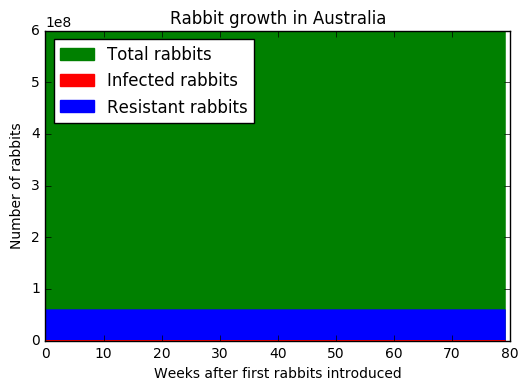

In [39]:
#Now try to make it so you start with a full population, like the simulation above.
num_iterations = 80
rabbit_population, infected, myxomatosis_resistant = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
percent_resistant = np.zeros(num_iterations)
rabbit_population[0] = 600000000
relative_week_myxo_released = 2
myxomatosis_resistant[0] = round(rabbit_population[0] / 10)
infected[relative_week_myxo_released] = num_myxo_released
for x in range(1, num_iterations):
    if x<17: #If it's under 17 weeks then the only sexually mature rabbits are the 24 that started
        pop = pop_grow(rabbit_population[x-1], 24)
    else:
        pop = pop_grow(rabbit_population[x-1], rabbit_population[x-time_to_sexual_maturity])
    if rabbit_population[x-1] < 2:
        print("Rabbits have been removed")
        break
    if x>week_myxo_released:
        infected[x] = spread_myxo(infected[x-1], myxomatosis_resistant[x-1], rabbit_population[x-1])
    rabbit_population[x] = rabbit_population[x-1] + pop - infected[x-myxo_time_to_death]
    myxomatosis_resistant[x] = myxomatosis_resistant[x-1] + (pop*percent_resistant[x-1])
    percent_resistant[x] = myxomatosis_resistant[x]/rabbit_population[x]

x = np.arange(num_iterations)
fig, ax = plt.subplots()
ax.fill_between(x, 0, rabbit_population, color='g')
ax.fill_between(x, 0, infected, color='r')
ax.fill_between(x, 0, myxomatosis_resistant, color='b')
ax.fill_between(x, 0, infected, color='r')
ax.set_title("Rabbit growth in Australia")
ax.set_xlabel("Weeks after first rabbits introduced")
ax.set_ylabel("Number of rabbits")
ax.legend(("Total rabbits", "Infected rabbits", "Resistant rabbits"), loc='upper left')
plt.show()

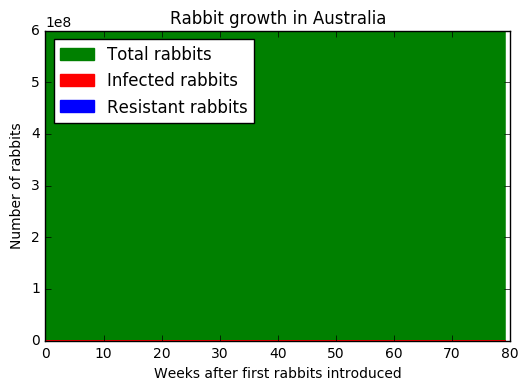

In [43]:
#Now let's start the population at 600000000 and introduce the disease
num_iterations = 80 # weeks
rabbit_population, infected, myxomatosis_resistant = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
percent_resistant = np.zeros(num_iterations)
rabbit_population[0] = 600000000
relative_week_myxo_released = 2
infected[relative_week_myxo_released] = num_myxo_released
for x in range(1, num_iterations):
    pop = pop_grow(rabbit_population[x-1], rabbit_population[x-time_to_sexual_maturity])
    if rabbit_population[x-1] < 2:
        print("Rabbits have been removed")
        break
    if x>week_myxo_released:
        infected[x] = spread_myxo(infected[x-1], myxomatosis_resistant[x-1], rabbit_population[x-1])
    dead_from_myxo = infected[x-myxo_time_to_death]
    rabbit_population[x] = rabbit_population[x-1] + pop - dead_from_myxo
    myxomatosis_resistant[x] = myxomatosis_resistant[x-1] + (pop*percent_resistant[x-1])
    percent_resistant[x] = myxomatosis_resistant[x]/rabbit_population[x]
    percent_resistant[x] = 0

    if rabbit_population[x] < 0:
        rabbit_population[x] = 0
    if infected[x] < 0:
        infected[x] = 0

x = np.arange(num_iterations)
fig, ax = plt.subplots()
ax.fill_between(x, 0, rabbit_population, color='g')
ax.fill_between(x, 0, infected, color='r')
ax.fill_between(x, 0, myxomatosis_resistant, color='b')
ax.fill_between(x, 0, infected, color='r')
ax.set_title("Rabbit growth in Australia")
ax.set_xlabel("Weeks after first rabbits introduced")
ax.set_ylabel("Number of rabbits")
ax.legend(("Total rabbits", "Infected rabbits", "Resistant rabbits"), loc='upper left')
plt.show()